In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

In [2]:
# Your code here

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

In [3]:
# Your code here

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [4]:
# Your code here

# Q2: FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [5]:
from scipy.fft import fft, fftshift, fftfreq
import math
import numpy as np
import matplotlib.pyplot as plt


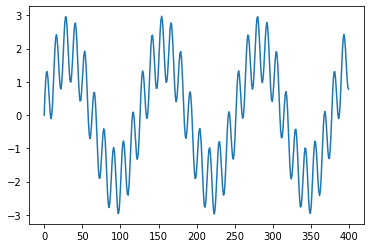

c:\Users\Shayan\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


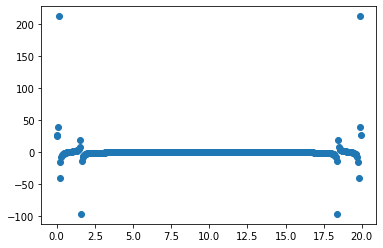

In [6]:
n = 1000
ti = 0    #s
tf = 20   #s
step = 0.05
modes=np.arange (ti, tf, step)
def X(t):
    return 2*np.sin(t) + np.sin(10*t)
x=np.array(X(modes))
plt.plot(x)
plt.show()
T_x=fft(x)
plt.scatter(modes, T_x)
plt.show()

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

In [7]:
# Answer here

## (b)

Calculate and plot Fourier transform of sawtooth function.

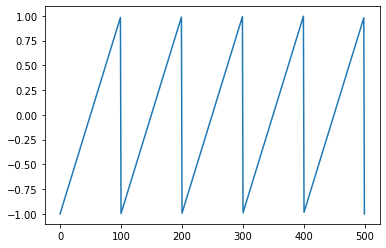

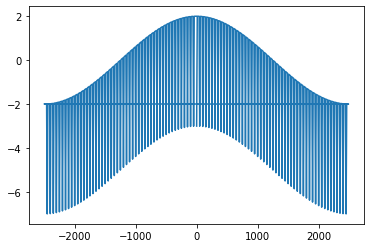

In [140]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500)
y=signal.sawtooth(2 * np.pi * 5 * t)
plt.plot(y)
plt.show()
T_y=fft(y)
T_y=fftshift(T_y)
n=t.size
frequency=fftfreq(n,d=0.0002)
plt.plot(frequency,T_y)
plt.show()

In [9]:
...

Ellipsis

# Q3: Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [106]:
import pandas as pd
df=pd.read_csv(r'Sunspots.csv')
print(df.head(5))


   Num        Date  Monthly
0    0  1749-01-31     96.7
1    1  1749-02-28    104.3
2    2  1749-03-31    116.7
3    3  1749-04-30     92.8
4    4  1749-05-31    141.7


In [107]:
df['datetime'] = df.iloc[:, 1:2]
df=df.drop(columns='Date')
df=df[['Num' , 'datetime' , 'Monthly']]
print(df.head(5))

   Num    datetime  Monthly
0    0  1749-01-31     96.7
1    1  1749-02-28    104.3
2    2  1749-03-31    116.7
3    3  1749-04-30     92.8
4    4  1749-05-31    141.7


## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

267007.69999999995

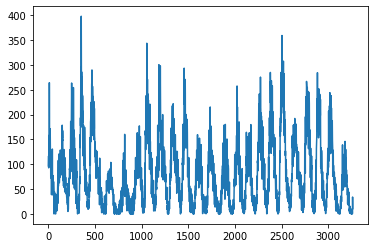

In [184]:
df['Monthly']=pd.to_numeric(df['Monthly'])
monthly=df['Monthly']
plt.plot(monthly)
ft=fft(monthly.values)
period=abs(ft)
period.max()

In [14]:
# The main period is: 267007.69999999995

## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

In [177]:
from scipy.fft import ifft
check=ifft(ft)
print(check)
print(monthly.values)

[ 96.7+2.45131803e-14j 104.3-1.41020427e-14j 116.7-4.45694188e-15j ...
  34. -7.29476034e-14j  21.8-2.13445732e-14j  10.4-3.64346293e-14j]
[ 96.7 104.3 116.7 ...  34.   21.8  10.4]


## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

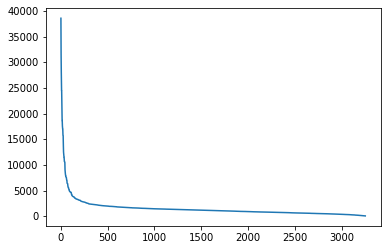

In [186]:
pr=np.sort(period)
pr=pr[::-1]
pr=pr[10:]
chekk=ifft(pr)
plt.plot(pr)

In [ ]:
#It looks different because we removed it's main frequencies which had most effect on Fourier transform because of their bigger coefficients.

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [80]:
import pandas as pd
df=pd.read_csv(r'2pcf.txt')
df=df.squeeze()
ac=df.autocorr()
print(ac)

0.9384409319172966


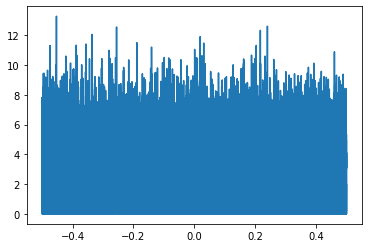

In [81]:
df=pd.read_csv(r'2pcf.txt')
ft=fft(df)
ft_abs=np.abs(ft)
ps=np.square(ft_abs)
frequency=fftfreq(99999, d=1.0)
plt.plot(frequency, ps)

# Q5: Real world example (Bonous question)

The two point correlation function is like autocorrelation but for multi-dimensional data. Here instead of "lags" we use distances.

The file `cmb_camb_N1024_PS12.npy` is part of the CMB temperature map, you can read it directly using `np.load` function.

Calculate the two point correlation for the CMB map, plot it, and then calculate the power spectrum and plot it too.

P.S. the provided data is 1024$\times$1024, it needs too much computational power to calculate correlation for every point. You may use only a fraction of data points, if they are chosen randomly, the result would be the same. Also for the distances, you do not need to cover the whole length of the image.

In [19]:
...

Ellipsis

In [20]:
# Your answers here